In [35]:
# task 1


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv('DS2_C6_S3_Cities_Data_Challenge.csv')
df2 = pd.read_csv('DS2_C6_S3_MoveHubCostOfLiving_Data_Challenge.csv')
df3 = pd.read_csv('DS2_C6_S3_MoveHubQualityOfLife_Data_Challenge.csv')
df4 = pd.read_csv('DS2_C6_S3_WorldCities_Data_Challenge.csv')

In [6]:
# task 2

df4.rename(columns = {'city' : 'City'} ,inplace = True)
df4.drop_duplicates(subset = ['City'],keep = 'first', inplace = True)

dfa = pd.merge(df1,df2,on = 'City')
dfb = pd.merge(df3,df4,on = 'City')
df = pd.merge(dfa,dfb,on = 'City')

df4 = df4.drop_duplicates(subset = ['City'],keep = 'first')

In [7]:
df.isnull().sum()

City                      0
Country                   0
Cappuccino                0
Cinema                    0
Wine                      0
Gasoline                  0
Avg Rent                  0
Avg Disposable Income     0
Movehub Rating            0
Purchase Power            0
Health Care               0
Pollution                 0
Quality of Life           0
Crime Rating              0
city_ascii                0
lat                       0
lng                       0
country                   0
iso2                      0
iso3                      0
admin_name                1
capital                  49
population                0
id                        0
dtype: int64

In [9]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna(df[i].mode()[0],inplace = True)
    else:
        df[i].fillna(df[i].mean())

In [11]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [12]:
numerics = df.drop(columns = ['lat', 'lng', 'id'])
df[numerics.columns] = StandardScaler().fit_transform(df[numerics.columns])
df

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,0.771053,1.256667,-0.053183,-0.186010,0.104033,-1.026946,0.083563,0.654451,0.687492,1.273496,...,0.771053,28.4772,-81.3369,1.268799,1.507911,1.537301,-0.716554,0.737091,-0.342296,1840015099
1,0.790281,0.182681,1.840785,0.711960,1.495633,1.538033,1.334086,1.533041,0.342337,0.339732,...,0.790281,59.9111,10.7528,0.227222,0.606028,0.600318,0.626012,0.737091,-0.516779,1578324706
2,0.809509,-1.249301,0.528536,0.112751,0.695463,-0.632334,-0.149842,1.644367,1.182715,2.318949,...,0.809509,45.4247,-75.6950,-1.214961,-1.068899,-1.060697,0.604702,0.737091,-0.471018,1124399363
3,0.828737,1.216890,0.663819,0.166764,0.234495,0.946115,0.556879,0.297741,0.169759,0.230055,...,0.828737,51.7519,-1.2578,1.228738,-0.424696,-0.421845,0.647323,0.737091,-0.600070,1826689568
4,0.982561,-0.891305,-1.054280,-0.682256,-0.180086,-2.069850,-1.206208,-1.373745,-1.899672,-1.585652,...,0.982561,-0.2186,-78.5097,-0.894476,-0.682377,-0.677386,0.711255,0.737091,-0.313085,1218441993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-1.517079,-0.652642,1.326708,-0.027346,-0.345338,1.199794,-0.970466,-0.831555,-0.454522,-0.991485,...,-1.517079,37.9794,23.7161,-0.654112,-0.381750,-0.379255,-1.547667,0.737091,-0.521331,1300715560
185,-1.517079,1.256667,1.326708,-0.027346,-0.345338,1.199794,-0.970466,-0.831555,-0.454522,-0.991485,...,-1.517079,37.9794,23.7161,-0.654112,-0.381750,-0.379255,-1.547667,0.737091,-0.521331,1300715560
186,-1.497851,1.256667,0.285026,-0.103302,-0.182985,-1.167879,-0.111115,0.960866,0.767028,1.764526,...,-1.497851,33.7627,-84.4224,1.268799,1.507911,1.537301,-0.631312,-1.406143,0.218293,1840013660
187,-1.478623,0.103126,0.271497,0.310237,0.321470,0.438756,0.465027,0.806063,0.993630,0.164148,...,-1.478623,-36.8500,174.7833,0.147101,0.648974,0.642908,-1.526356,-1.406143,-0.397102,1554435911


In [19]:
# task 3

x = df.loc[: , ['Purchase Power' , 'Avg Rent']].values
x

array([[ 1.27349554e+00,  8.35627113e-02],
       [ 3.39731907e-01,  1.33408555e+00],
       [ 2.31894857e+00, -1.49842013e-01],
       [ 2.30054929e-01,  5.56878786e-01],
       [-1.58565248e+00, -1.20620833e+00],
       [ 4.18216351e-01,  1.08427848e-01],
       [-2.76572214e-01, -6.24418007e-02],
       [ 8.32775205e-01,  1.18135674e-01],
       [-1.55747858e+00, -4.89824374e-01],
       [ 5.68141761e-01, -1.45434779e-01],
       [ 4.89154213e-01,  1.41806122e+00],
       [-1.08053465e+00, -5.56200890e-01],
       [-1.17087801e-01,  8.69985953e-01],
       [-1.49006245e+00, -9.37337285e-01],
       [-1.21737932e+00, -6.95162761e-01],
       [-1.04732970e+00,  1.40932120e+00],
       [-8.51621693e-01, -7.70175073e-01],
       [ 8.81576429e-01,  2.35344273e-01],
       [ 1.57988673e+00, -8.73813844e-02],
       [ 7.56806288e-01, -2.44761324e-01],
       [ 8.78557797e-01, -7.60124793e-01],
       [-6.55913690e-01,  1.50464252e+00],
       [ 2.58731937e-01,  2.35344273e-01],
       [-1.

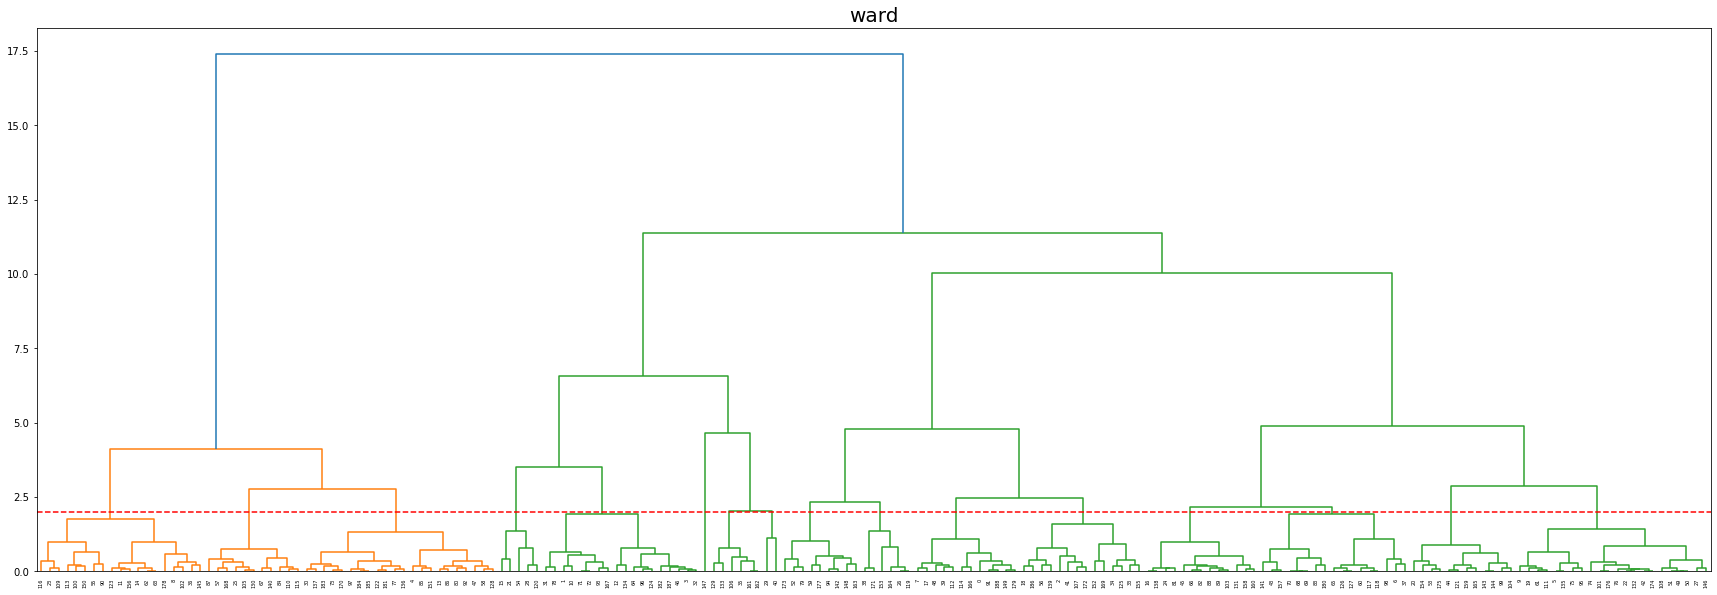

In [26]:
plt.figure(figsize=(30,10))
den = sch.dendrogram(sch.linkage(x, method='ward'), labels = df.index)
plt.axhline(y=2 , color='r', linestyle='--')
plt.title('ward', fontsize = 20);

Text(0.5, 1.0, 'ward')

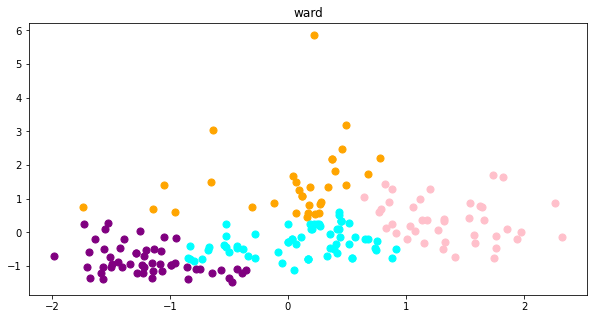

In [30]:
hc = AgglomerativeClustering(n_clusters= 4 , affinity = 'euclidean' , linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.figure(figsize = (10,5))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'orange')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'pink')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'purple')
plt.title('ward')

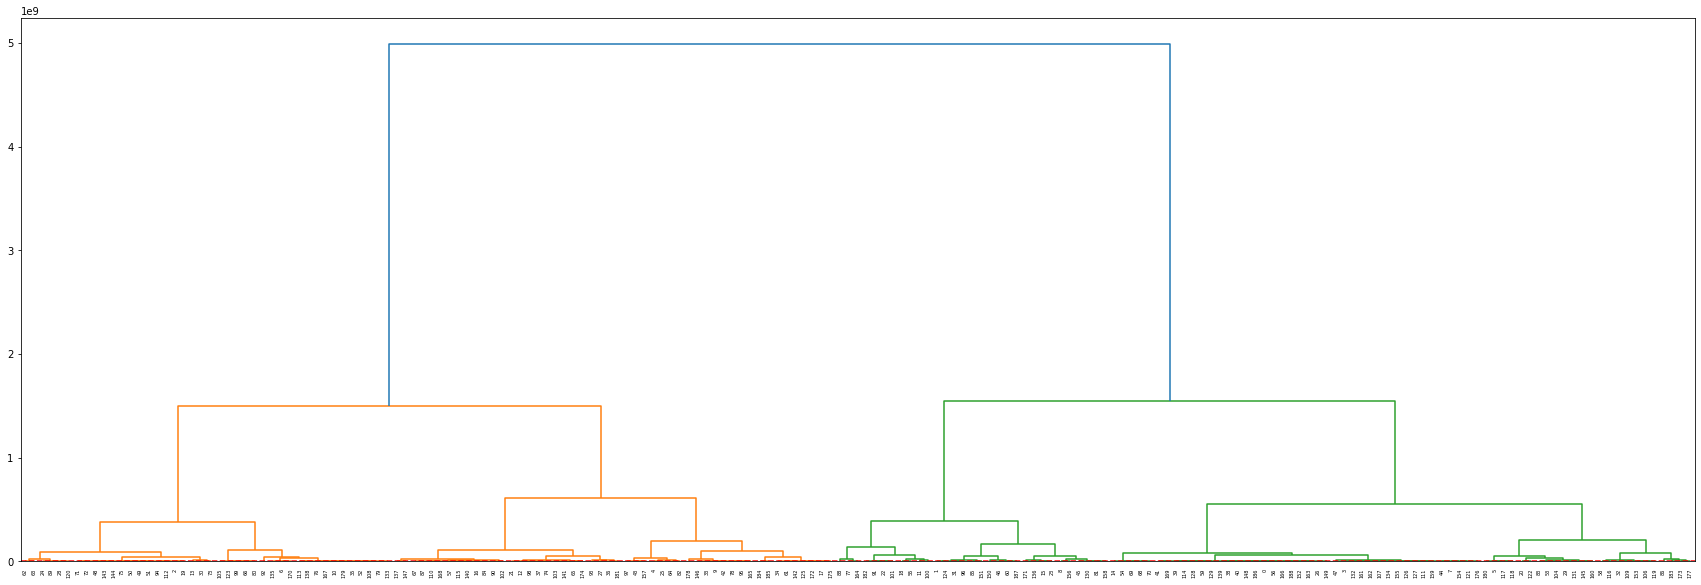

In [31]:
# task 4 whole data

plt.figure(figsize=(30,10))
sch.dendrogram(sch.linkage(df, method='ward'), labels = df.index)
plt.axhline(y=6 , color='r', linestyle='--')

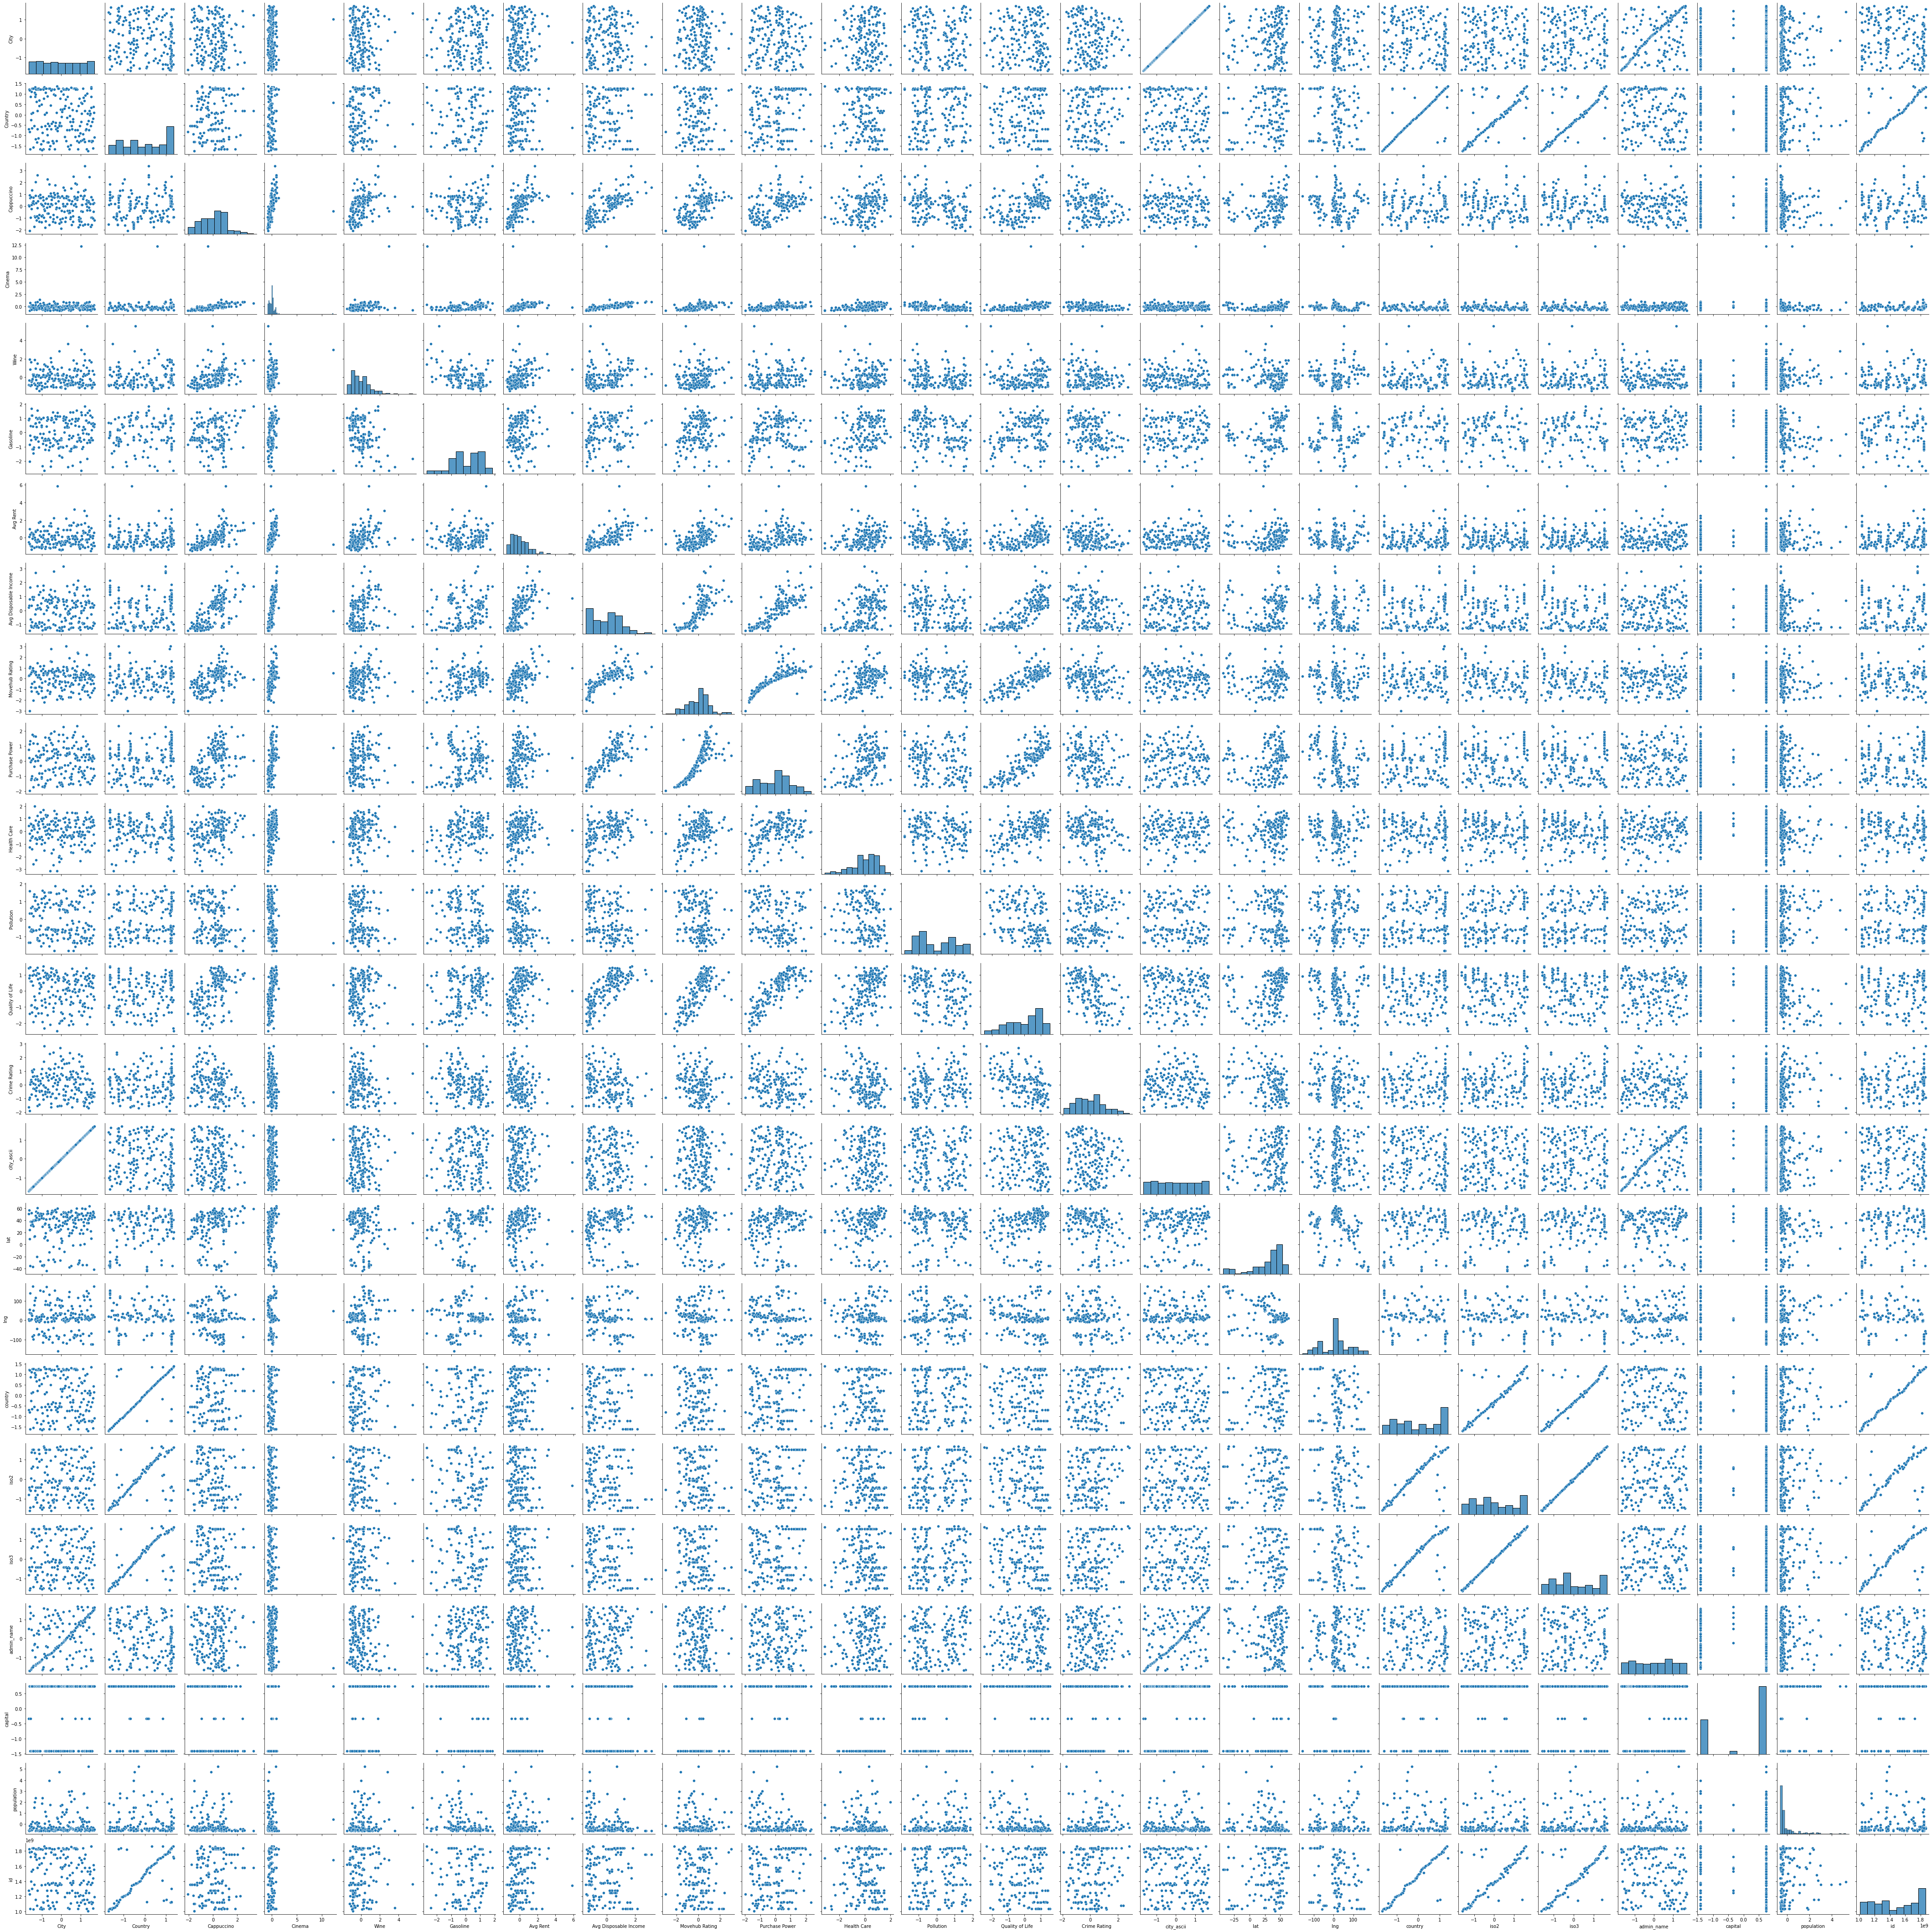

In [34]:
sns.pairplot(df)